In [1]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
from scipy import stats

In [2]:
# Visualization Packages
import matplotlib as mlp
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
%matplotlib inline

In [4]:
df = pd.read_csv("train.csv")

In [5]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [6]:
# check a quick info data

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
# all analysis project begin with trying to answer this question: " What do i want to achieve from this data set"

In [8]:
# the data should closely relate to the questions

# Who were the passenger on the Titanic?

In [9]:
# Check genders with factorplot(deprecated) -- use countplot

In [10]:
sns.countplot(x = "Sex", data = df)

<Axes: xlabel='Sex', ylabel='count'>

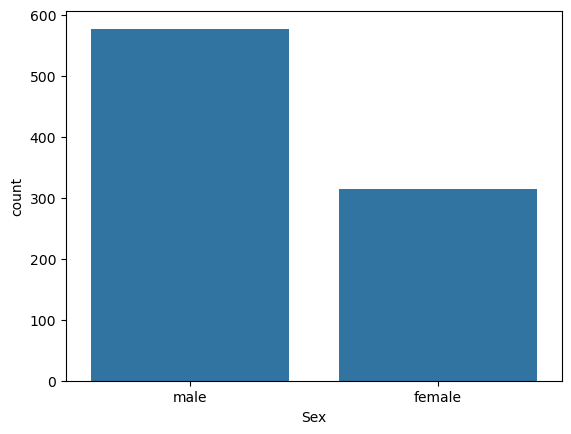

In [11]:
plt.show()

In [12]:
# count the population in each class separated by gender ( male vs female)

In [13]:
sns.countplot(x = "Pclass", data = df, hue = "Sex")

<Axes: xlabel='Pclass', ylabel='count'>

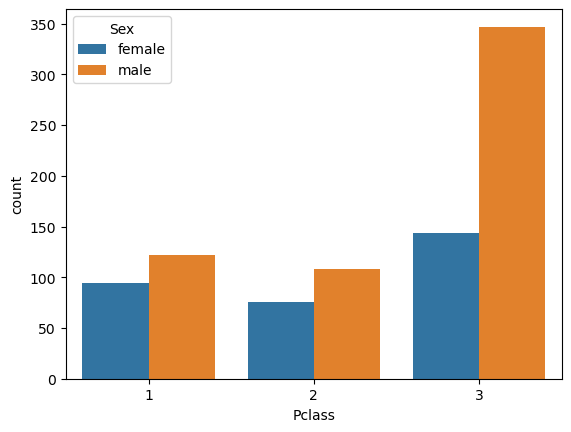

In [14]:
plt.show()

In [15]:
# most the male passengers were in the 3rd class, where 1st and second were more of even.
# 1st policy

In [16]:
# Female and Children got prioritized when it comes to being rescued. Factor contribute to survival rate !!!

In [17]:
# Filter out people who are under 16

# Gender = Children

In [18]:
def gender(passenger):
    age,sex = passenger

    if age < 16:
        return "child"
    else:
        return sex

In [19]:
df["person"] = df[["Age","Sex"]].apply(gender, axis = 1)

In [20]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [21]:
# Re-analyse the data with new classified_gender

In [22]:
sns.countplot(x = "Pclass", data = df, hue = "person")

<Axes: xlabel='Pclass', ylabel='count'>

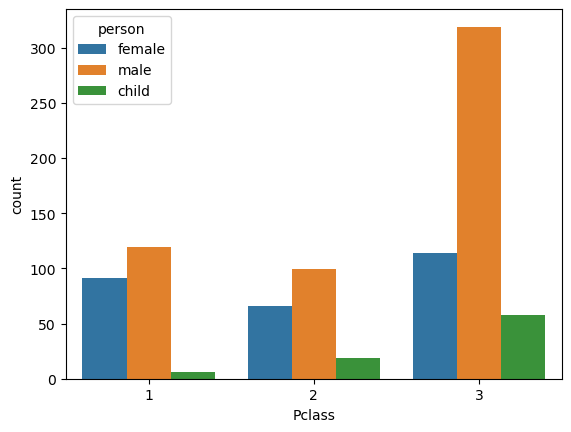

In [23]:
plt.show()

In [24]:
df["Age"].hist(bins = 20)

<Axes: >

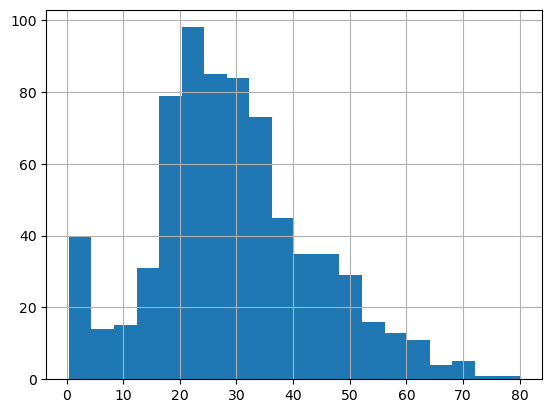

In [25]:
plt.show()

In [26]:
df["Age"].mean()

29.69911764705882

In [27]:
df["person"].value_counts()

person
male      537
female    271
child      83
Name: count, dtype: int64

In [28]:
                                                                # Part_2

In [29]:
# facet grid with Seaborn - use multiple plot in 1 figure

In [30]:
fig = sns.FacetGrid(data = df, hue = "person", aspect = 4)

# use map to plot all the possible kde plots by hue choice
fig.map(sns.kdeplot,"Age", fill = True)

# set up x_max by the oldest passenger
oldest = df["Age"].max()

fig.set(xlim = (0, oldest))

fig.add_legend()


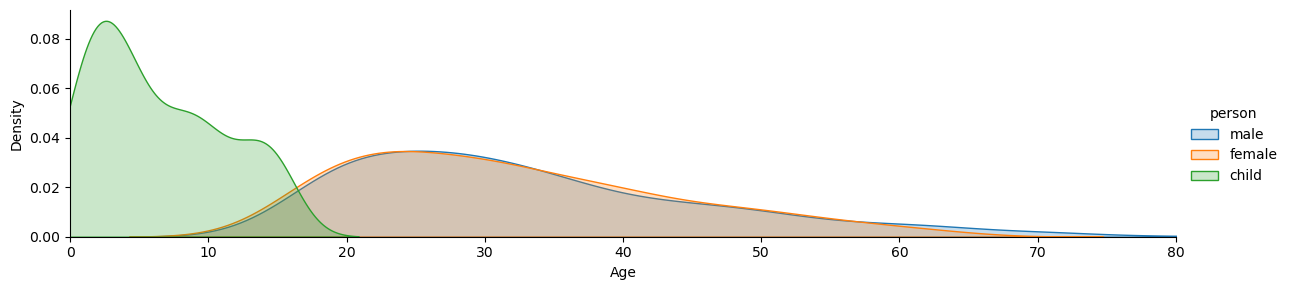

In [31]:
plt.show()

In [32]:
fig = sns.FacetGrid(data = df, hue = "Pclass", aspect = 4)

# use map to plot all the possible kde plots by hue choice
fig.map(sns.kdeplot,"Age", fill = True)

# set up x_max by the oldest passenger
oldest = df["Age"].max()

fig.set(xlim = (0, oldest))

fig.add_legend()

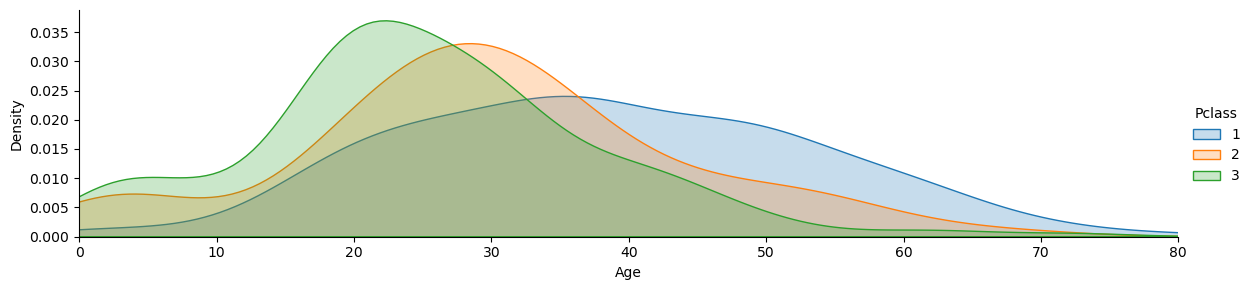

In [33]:
plt.show()

In [34]:
# in this graph we got P1 = normal distribution, but the 2nd and 3rd class seemed skewed toward the age range of 20 to 35. 

In [35]:
# A KDE plot is a smooth curve that estimates the probability distribution of a dataset

# KDE gives you a continuous curve to visualize how data is distributed

# What deck were the passengers on and how does that relate to their class

In [36]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [37]:
deck = df["Cabin"].dropna()

In [114]:
deck.head(20)

1             C85
3            C123
6             E46
10             G6
11           C103
21            D56
23             A6
27    C23 C25 C27
31            B78
52            D33
54            B30
55            C52
61            B28
62            C83
66            F33
75          F G73
88    C23 C25 C27
92            E31
96             A5
97        D10 D12
Name: Cabin, dtype: object

In [39]:
type(deck)

pandas.core.series.Series

In [40]:
# Grab the only first letter of the deck

In [41]:
# create a deck list
deck_level = []

In [42]:
# loop through each customer's deck and grab the first letter 
for level in deck:
    deck_level.append(level[0])

In [43]:
# create a dataframe from the list
cabin_df = DataFrame(deck_level)

# set the columns = cabins
cabin_df.columns = ["Cabin"]


In [44]:
# plot it
sns.countplot(x = "Cabin", data = cabin_df)


<Axes: xlabel='Cabin', ylabel='count'>

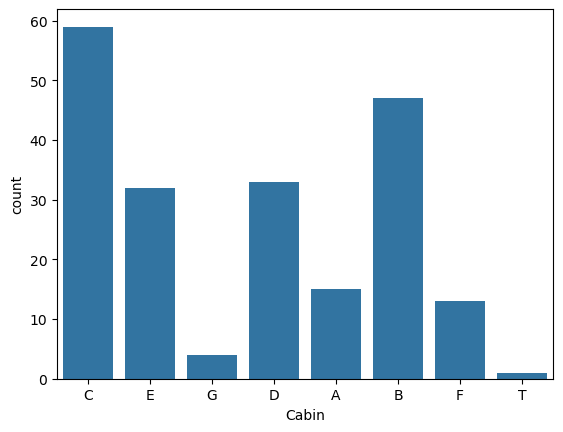

In [45]:
plt.show()

In [46]:
cabin_df = cabin_df[cabin_df.Cabin != "T"]

# sort values in ascending order A to G
cabin_df.sort_values(by = ["Cabin"], inplace = True)

sns.countplot(x = "Cabin", data = cabin_df)

<Axes: xlabel='Cabin', ylabel='count'>

In [47]:
cabin_df.value_counts()

Cabin
C        59
B        47
D        33
E        32
A        15
F        13
G         4
Name: count, dtype: int64

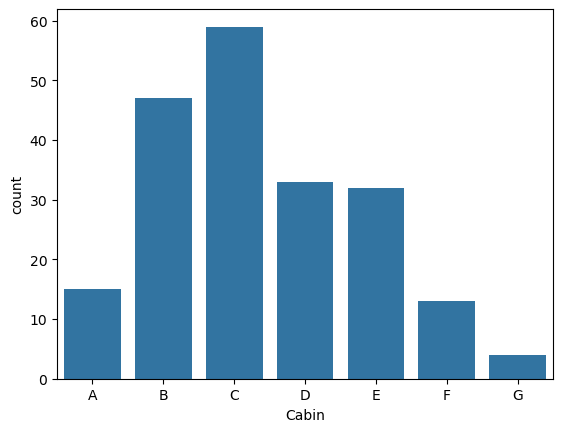

In [48]:
plt.show()

# Where did the passengers come from 

In [49]:
sns.countplot(x= "Embarked", data = df, hue = "Pclass")

<Axes: xlabel='Embarked', ylabel='count'>

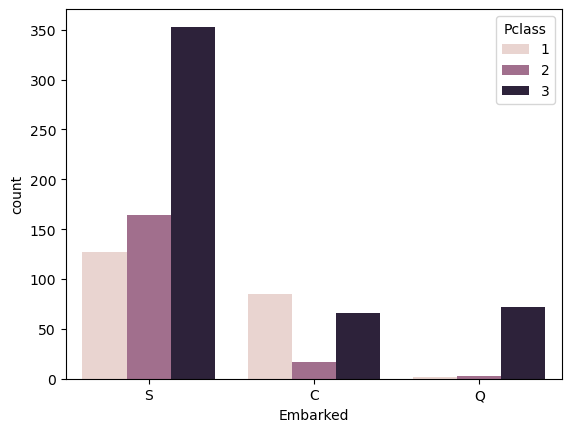

In [50]:
plt.show()

In [51]:
# it is noticable that most tickets from Queenstown were from 3rd class --> what was the economy of that city in that period.

# Who was alone and who was with family

In [52]:
df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child


In [53]:
df["Alone"] = df.SibSp + df.Parch

In [54]:
df["Alone"].head(10)

0    1
1    1
2    0
3    1
4    0
5    0
6    0
7    4
8    2
9    1
Name: Alone, dtype: int64

In [55]:
# if they are with siblings or have kids then they was not alone, meaning Alone = Sibsp + Parch = 0

In [56]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,1
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,1
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,0


In [57]:
# set the alone status

In [58]:
pd.set_option("chained_assignment", None)

In [59]:
# df["Alone"].loc[df["Alone"] > 0] = " With Family"

# df["Alone"].loc[df["Alone"] == 0] = "Alone"

# Lambda function : 

df['Alone'] = df.Alone.map(lambda x : 'With Family' if x > 0 else 'Alone')


In [60]:
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone


In [61]:
sns.countplot( x = "Pclass", data = df, hue = "Alone")

<Axes: xlabel='Pclass', ylabel='count'>

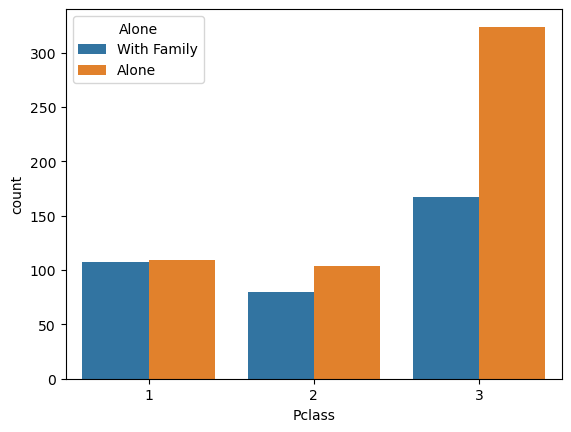

In [62]:
plt.show()

In [63]:
# This graph above shows wether passenger was alone or with family in each Pclass

# Lots of passenger from 3rd class was alone.

In [94]:
# create a new table with map( adding a dictionary)
df["Survivor"] = df.Survived.map({ 0 : "no", 1: "yes"})

In [65]:
df

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S,male,Alone,no
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S,female,Alone,yes
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S,female,With Family,no
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C,male,Alone,yes


In [66]:
sns.countplot(data = df, x=  "Survivor")

<Axes: xlabel='Survivor', ylabel='count'>

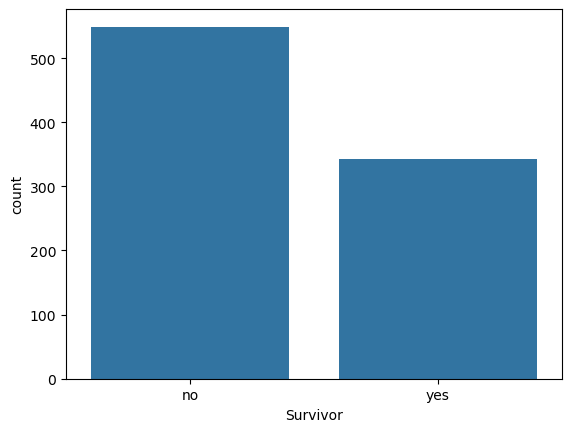

In [67]:
plt.show()

In [68]:
# consider gender factor when it conmes to survivor rate

In [69]:
sns.lineplot(data = df, x = "Pclass", y = "Survived", hue = "person")

<Axes: xlabel='Pclass', ylabel='Survived'>

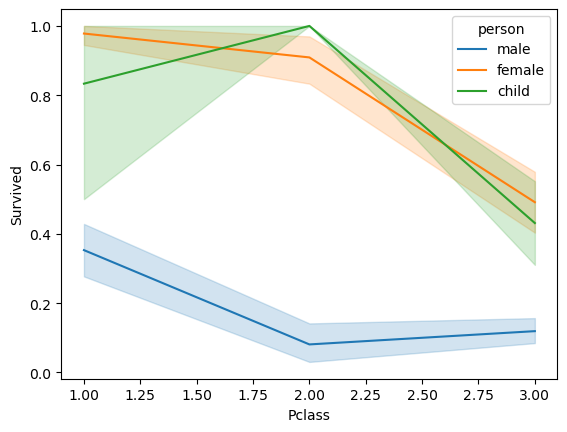

In [70]:
plt.show()

In [71]:
# Being a male in any class, or being in the 3rd class itself decrease dramatically your chance of survival

In [72]:
# make bins generation

In [73]:
age_gen = [10,20,30,40,50,60,70,80]

In [74]:
sns.lmplot(data= df, x = "Age", y = "Survived")

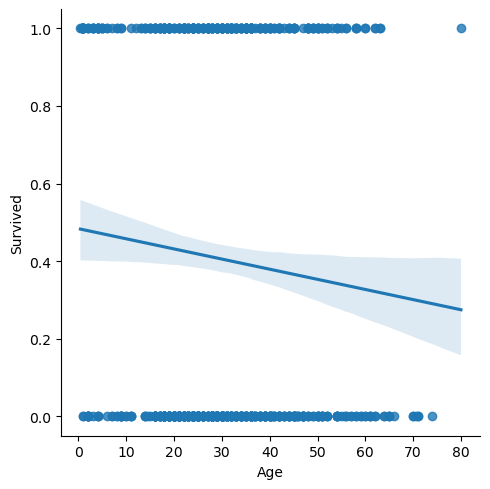

In [75]:
plt.show()

In [76]:
# we notice that age is also a major factor, based on the linear line, the older the passenger was, the less likely they survived

In [77]:
sns.lmplot(data= df, x = "Age", y = "Survived", hue = "Pclass", x_bins = age_gen)

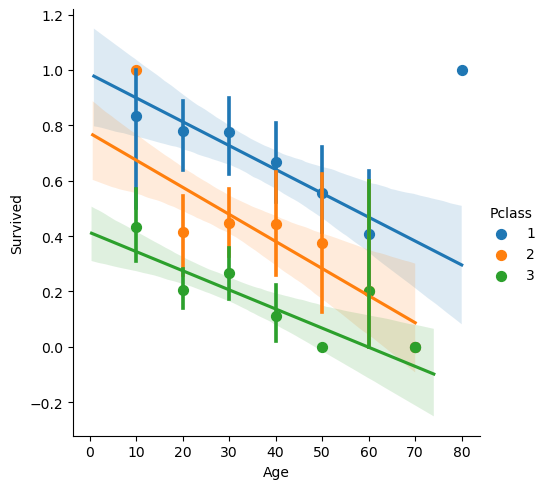

In [78]:
plt.show()

In [79]:
sns.lmplot(data= df, x = "Age", y = "Survived", hue = "Sex", x_bins = age_gen)

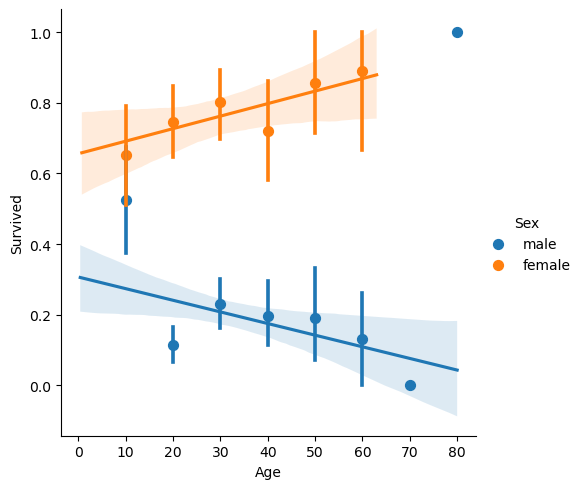

In [80]:
plt.show()

# Tasks

In [81]:
# 1st Question :  Did the deck have an effect on the passenger survival rate ?

In [82]:
# 2nd Question : Did having a family member the odds of surviving the crash

In [112]:
df.head(20)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,person,Alone,Survivor
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,male,With Family,no
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,female,With Family,yes
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,female,Alone,yes
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,female,With Family,yes
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,male,Alone,no
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q,male,Alone,no
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S,male,Alone,no
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S,child,With Family,no
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S,female,With Family,yes
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C,child,With Family,yes


In [85]:
# 1st Question :  Did the deck have an effect on the passenger survival rate ?

In [104]:
titanic_df = DataFrame(df, columns = ["PassengerId", "Survived", "Pclass", "Sex", "Cabin", "person", "Alone"])

In [117]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Cabin,person,Alone
0,1,0,3,male,NaN,male,With Family
1,2,1,1,female,C85,female,With Family
2,3,1,3,female,NaN,female,Alone
3,4,1,1,female,C123,female,With Family
4,5,0,3,male,NaN,male,Alone
...,...,...,...,...,...,...,...
886,887,0,2,male,NaN,male,Alone
887,888,1,1,female,B42,female,Alone
888,889,0,3,female,NaN,female,With Family
889,890,1,1,male,C148,male,Alone


In [119]:
cabin_df["PassengerId"] = df["PassengerId"]

In [125]:
cabin_df.columns = ["Cabin", "Survived", "PassengerID"] 

In [126]:
cabin_df

,Cabin,Survived,PassengerID
18,A,0,19
33,A,0,34
41,A,0,42
97,A,1,98
146,A,1,147
...,...,...,...
117,F,0,118
48,G,0,49
90,G,0,91
3,G,1,4


In [136]:
sns.countplot(x = "Survivor", data = cabin_df, hue = "Cabin")

<Axes: xlabel='Survivor', ylabel='count'>

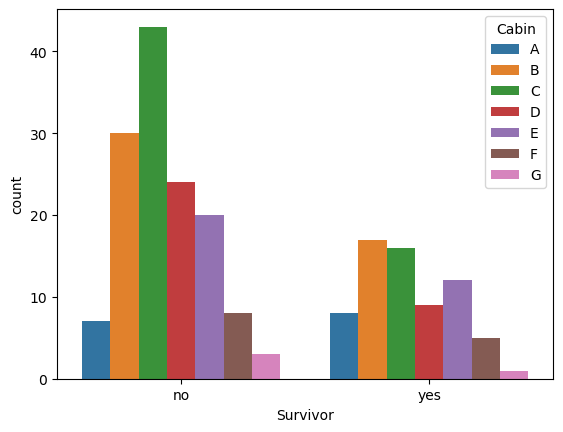

In [137]:
plt.show()

In [133]:
cabin_df["Survivor"] = df["Survivor"]

In [143]:
cabin_df["Age"] = df["Age"]

In [147]:
cabin_df["Pclass"] = df["Pclass"]

In [148]:
cabin_df

,Cabin,Survived,PassengerID,Survivor,Age,Pclass
18,A,0,19,no,31.0,3
33,A,0,34,no,66.0,2
41,A,0,42,no,27.0,2
97,A,1,98,yes,23.0,1
146,A,1,147,yes,27.0,3
...,...,...,...,...,...,...
117,F,0,118,no,29.0,2
48,G,0,49,no,NaN,3
90,G,0,91,no,29.0,3
3,G,1,4,yes,35.0,1


In [166]:
sns.lineplot(data = cabin_df, x = "Cabin", y = "Survived")

<Axes: xlabel='Cabin', ylabel='Survived'>

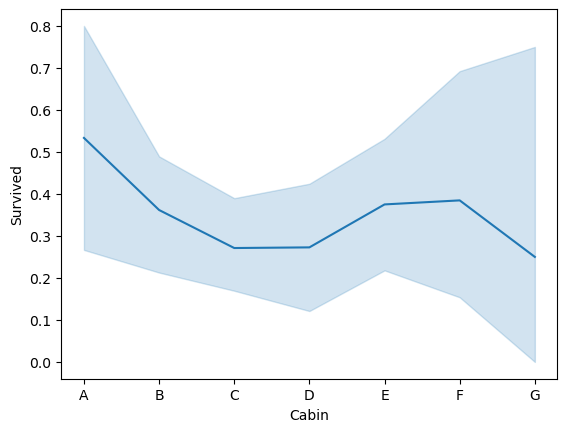

In [167]:
plt.show()

In [159]:
# it seems that people who are in deck A tend to have higher survival rate compared to the others

In [170]:
sns.lineplot(data = cabin_df, x = "Cabin", y = "Survived", hue = "Pclass", palette = "magma")

<Axes: xlabel='Cabin', ylabel='Survived'>

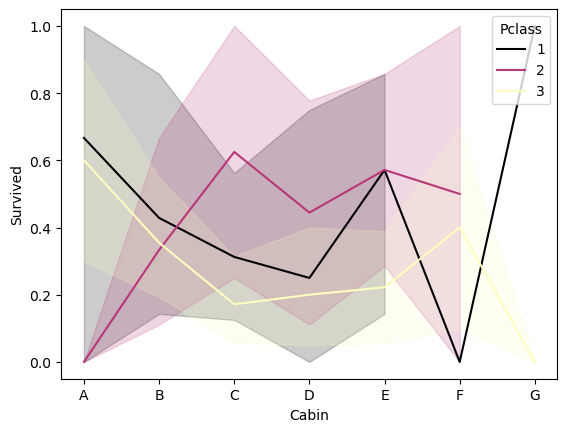

In [171]:
plt.show()

In [173]:
# 2nd Question : Did having a family member the odds of surviving the crash

In [176]:
sns.lineplot(data = titanic_df, x = "Alone", y = "Survived", hue = "Pclass")

<Axes: xlabel='Alone', ylabel='Survived'>

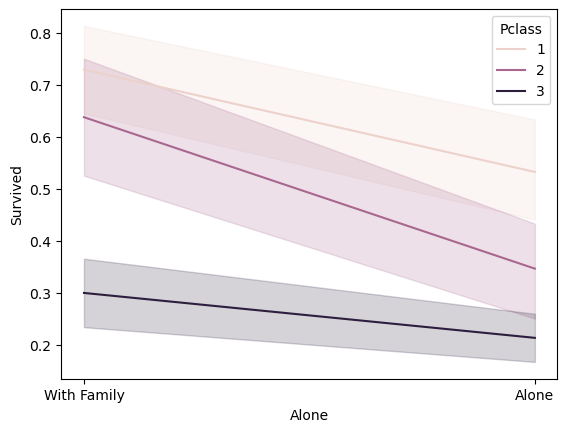

In [177]:
plt.show()

In [178]:
# we can notice that having family tended to increase your survival rate in each class